In [ ]:
import yfinance as yf
import pandas as pd
import os


In [ ]:
tickers = ['AMZN', 'TSLA']
start_date = '2018-01-01'
end_date = '2024-12-06'

In [ ]:
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    output_file = f"{ticker}.csv"  # Save in the current folder
    data.to_csv(output_file)
    print(f"Saved {ticker} data to {output_file}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Saved AMZN data to AMZN.csv
Saved TSLA data to TSLA.csv


# Loading CSV files and calculating indicators

In [55]:
# Read the CSV file into a DataFrame
df_AMZN = pd.read_csv("AMZN.csv")

# Display the first few rows of the DataFrame
print(df_AMZN.head())

        Price           Adj Close               Close               High  \
0      Ticker                AMZN                AMZN               AMZN   
1        Date                 NaN                 NaN                NaN   
2  2018-01-02   59.45050048828125   59.45050048828125               59.5   
3  2018-01-03  60.209999084472656  60.209999084472656  60.27450180053711   
4  2018-01-04   60.47949981689453   60.47949981689453  60.79349899291992   

                  Low                Open    Volume  
0                AMZN                AMZN      AMZN  
1                 NaN                 NaN       NaN  
2    58.5255012512207  58.599998474121094  53890000  
3  59.415000915527344  59.415000915527344  62176000  
4  60.233001708984375               60.25  60442000  


In [56]:
print(df_AMZN.tail())

           Price           Adj Close               Close                High  \
1741  2024-11-29  207.88999938964844  207.88999938964844   208.1999969482422   
1742  2024-12-02   210.7100067138672   210.7100067138672  212.99000549316406   
1743  2024-12-03  213.44000244140625  213.44000244140625  214.02000427246094   
1744  2024-12-04  218.16000366210938  218.16000366210938               220.0   
1745  2024-12-05   220.5500030517578   220.5500030517578  222.14999389648438   

                     Low                Open    Volume  
1741  204.58999633789062   205.8300018310547  24892400  
1742  209.50999450683594   209.9600067138672  39523200  
1743  209.64999389648438  210.30999755859375  32214800  
1744              215.75   215.9600067138672  48745700  
1745   217.3000030517578  218.02999877929688  41140200  


In [57]:

# Remove the first two rows (which contain unwanted data)
df_AMZN = df_AMZN.iloc[2:].reset_index(drop=True)

# Drop the first two columns (Ticker and the next one)
df_AMZN = df_AMZN.drop(df_AMZN.columns[1], axis=1)

# Print the cleaned DataFrame
print(df_AMZN.head())


        Price               Close                High                 Low  \
0  2018-01-02   59.45050048828125                59.5    58.5255012512207   
1  2018-01-03  60.209999084472656   60.27450180053711  59.415000915527344   
2  2018-01-04   60.47949981689453   60.79349899291992  60.233001708984375   
3  2018-01-05  61.457000732421875  61.457000732421875                60.5   
4  2018-01-08   62.34349822998047   62.65399932861328   61.60150146484375   

                 Open    Volume  
0  58.599998474121094  53890000  
1  59.415000915527344  62176000  
2               60.25  60442000  
3    60.8754997253418  70894000  
4   61.79999923706055  85590000  


In [58]:
# Rename the 'Price' column to 'Date'
df_AMZN = df_AMZN.rename(columns={'Price': 'Date'})

# Print the updated DataFrame
print(df_AMZN.head())


         Date               Close                High                 Low  \
0  2018-01-02   59.45050048828125                59.5    58.5255012512207   
1  2018-01-03  60.209999084472656   60.27450180053711  59.415000915527344   
2  2018-01-04   60.47949981689453   60.79349899291992  60.233001708984375   
3  2018-01-05  61.457000732421875  61.457000732421875                60.5   
4  2018-01-08   62.34349822998047   62.65399932861328   61.60150146484375   

                 Open    Volume  
0  58.599998474121094  53890000  
1  59.415000915527344  62176000  
2               60.25  60442000  
3    60.8754997253418  70894000  
4   61.79999923706055  85590000  


In [59]:
# Convert the columns to numeric (if they are not already)
df_AMZN[['Close', 'High', 'Low', 'Open']] = df_AMZN[['Close', 'High', 'Low', 'Open']].apply(pd.to_numeric, errors='coerce')

# Round all columns except 'Date' and 'Volume' to 2 decimal places
df_AMZN[['Close', 'High', 'Low', 'Open']] = df_AMZN[['Close', 'High', 'Low', 'Open']].round(2)

# Print the updated DataFrame
print(df_AMZN.head())


         Date  Close   High    Low   Open    Volume
0  2018-01-02  59.45  59.50  58.53  58.60  53890000
1  2018-01-03  60.21  60.27  59.42  59.42  62176000
2  2018-01-04  60.48  60.79  60.23  60.25  60442000
3  2018-01-05  61.46  61.46  60.50  60.88  70894000
4  2018-01-08  62.34  62.65  61.60  61.80  85590000


In [60]:
df_AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1744 non-null   object 
 1   Close   1744 non-null   float64
 2   High    1744 non-null   float64
 3   Low     1744 non-null   float64
 4   Open    1744 non-null   float64
 5   Volume  1744 non-null   object 
dtypes: float64(4), object(2)
memory usage: 81.9+ KB


In [61]:
# Convert 'Volume' to numeric
df_AMZN['Volume'] = pd.to_numeric(df_AMZN['Volume'], errors='coerce')

# Convert 'Date' to datetime format
df_AMZN['Date'] = pd.to_datetime(df_AMZN['Date'], errors='coerce')

# Print the updated dtypes and first few rows
print(df_AMZN.dtypes)
print(df_AMZN.head())


Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object
        Date  Close   High    Low   Open    Volume
0 2018-01-02  59.45  59.50  58.53  58.60  53890000
1 2018-01-03  60.21  60.27  59.42  59.42  62176000
2 2018-01-04  60.48  60.79  60.23  60.25  60442000
3 2018-01-05  61.46  61.46  60.50  60.88  70894000
4 2018-01-08  62.34  62.65  61.60  61.80  85590000


In [62]:

def calculate_indicators(data):
    # Simple Moving Average (SMA)
    data['SMA_50'] = data['Close'].rolling(window=50).mean()

    # Exponential Moving Average (EMA)
    data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

    # Relative Strength Index (RSI)
    def calculate_rsi(data, window=14):
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    data['RSI'] = calculate_rsi(data)

    # MACD
    data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
    data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Bollinger Bands
    def calculate_bollinger_bands(data, window=20, num_sd=2):
        data['SMA_20'] = data['Close'].rolling(window=window).mean()
        data['Upper_Band'] = data['SMA_20'] + (data['Close'].rolling(window=window).std() * num_sd)
        data['Lower_Band'] = data['SMA_20'] - (data['Close'].rolling(window=window).std() * num_sd)
    calculate_bollinger_bands(data)

    # Stochastic Oscillator
    def calculate_stochastic(data, k_window=14, d_window=3):
        data['L14'] = data['Low'].rolling(window=k_window).min()
        data['H14'] = data['High'].rolling(window=k_window).max()
        data['%K'] = (data['Close'] - data['L14']) / (data['H14'] - data['L14']) * 100
        data['%D'] = data['%K'].rolling(window=d_window).mean()
        return data
    data = calculate_stochastic(data)

    return data

stock_data = calculate_indicators(df_AMZN)
#stock_data.to_csv(file_path)
print(stock_data.head())


        Date  Close   High    Low   Open    Volume  SMA_50     EMA_50  RSI  \
0 2018-01-02  59.45  59.50  58.53  58.60  53890000     NaN  59.450000  NaN   
1 2018-01-03  60.21  60.27  59.42  59.42  62176000     NaN  59.479804  NaN   
2 2018-01-04  60.48  60.79  60.23  60.25  60442000     NaN  59.519027  NaN   
3 2018-01-05  61.46  61.46  60.50  60.88  70894000     NaN  59.595144  NaN   
4 2018-01-08  62.34  62.65  61.60  61.80  85590000     NaN  59.702785  NaN   

      EMA_12     EMA_26      MACD  Signal_Line  SMA_20  Upper_Band  \
0  59.450000  59.450000  0.000000     0.000000     NaN         NaN   
1  59.566923  59.506296  0.060627     0.012125     NaN         NaN   
2  59.707396  59.578422  0.128974     0.035495     NaN         NaN   
3  59.977028  59.717799  0.259229     0.080242     NaN         NaN   
4  60.340562  59.912036  0.428526     0.149899     NaN         NaN   

   Lower_Band  L14  H14  %K  %D  
0         NaN  NaN  NaN NaN NaN  
1         NaN  NaN  NaN NaN NaN  
2       

In [63]:
print(stock_data.tail())


           Date   Close    High     Low    Open    Volume    SMA_50  \
1739 2024-11-29  207.89  208.20  204.59  205.83  24892400  194.4946   
1740 2024-12-02  210.71  212.99  209.51  209.96  39523200  194.8768   
1741 2024-12-03  213.44  214.02  209.65  210.31  32214800  195.2680   
1742 2024-12-04  218.16  220.00  215.75  215.96  48745700  195.7520   
1743 2024-12-05  220.55  222.15  217.30  218.03  41140200  196.3124   

          EMA_50        RSI      EMA_12      EMA_26      MACD  Signal_Line  \
1739  195.997499  49.687567  204.009065  200.830835  3.178230     3.609105   
1740  196.574460  54.040510  205.039978  201.562625  3.477353     3.582755   
1741  197.235854  54.665294  206.332289  202.442431  3.889858     3.644175   
1742  198.056409  54.222130  208.151937  203.606695  4.545242     3.824389   
1743  198.938510  59.477534  210.059331  204.861755  5.197576     4.099026   

       SMA_20  Upper_Band  Lower_Band     L14     H14         %K         %D  
1739  204.505  214.771441 

In [64]:
stock_data.to_csv('stock_data.csv', index=False)


In [65]:
## REMOVE SMA_50  L14     H14         %K         %D

In [66]:
df1=stock_data.reset_index()['Close']

In [67]:
df1.tail()

,Close
1739,207.89
1740,210.71
1741,213.44
1742,218.16
1743,220.55


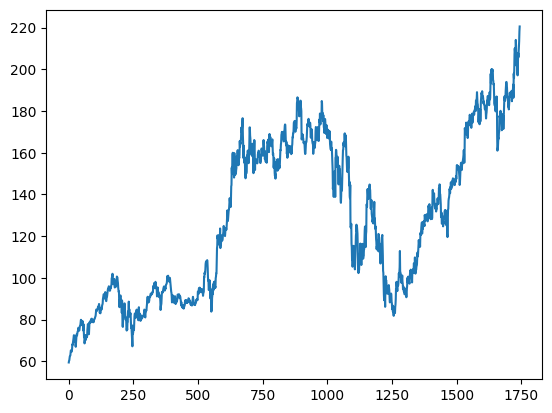

In [68]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [69]:
# Load GDP dataset
gdp_df = pd.read_csv("GDP.csv")

In [111]:
print(gdp_df.head())

        Date        GDP
0 2018-01-01  20328.553
1 2018-04-01  20580.912
2 2018-07-01  20798.730
3 2018-10-01  20917.867
4 2019-01-01  21111.600


In [70]:
# Preprocess GDP
gdp_df['DATE'] = pd.to_datetime(gdp_df['DATE'], errors='coerce')
gdp_df.rename(columns={"DATE": "Date"}, inplace=True)  # Rename for merging

In [71]:
# Load Unemployment rate dataset
unemployment_df = pd.read_csv("UNRATE.csv")

In [112]:
print(unemployment_df.head())

        Date  UNRATE
0 2018-11-01     3.8
1 2018-12-01     3.9
2 2019-01-01     4.0
3 2019-02-01     3.8
4 2019-03-01     3.8


In [72]:
# Preprocess Unemployment
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'], errors='coerce')
unemployment_df.rename(columns={"DATE": "Date"}, inplace=True)  # Rename for merging


In [73]:
# Merge datasets on Date
merged_df = pd.merge(df_AMZN, gdp_df, on='Date', how='left')
merged_df = pd.merge(merged_df, unemployment_df, on='Date', how='left')
merged_df.rename(columns={"GDP": "GDP_Value", "UNRATE": "Unemployment_Rate"}, inplace=True)


In [74]:
# Check for missing values
print("Merged DataFrame Info:")
print(merged_df.info())


Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1744 non-null   datetime64[ns]
 1   Close              1744 non-null   float64       
 2   High               1744 non-null   float64       
 3   Low                1744 non-null   float64       
 4   Open               1744 non-null   float64       
 5   Volume             1744 non-null   int64         
 6   SMA_50             1695 non-null   float64       
 7   EMA_50             1744 non-null   float64       
 8   RSI                1731 non-null   float64       
 9   EMA_12             1744 non-null   float64       
 10  EMA_26             1744 non-null   float64       
 11  MACD               1744 non-null   float64       
 12  Signal_Line        1744 non-null   float64       
 13  SMA_20             1725 non-null   float

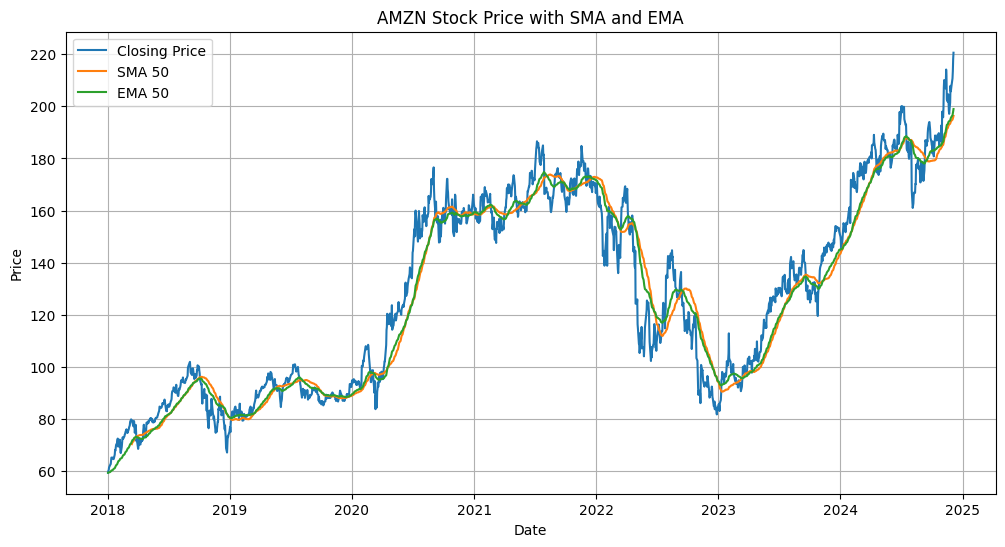

In [113]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.plot(stock_data['Date'], stock_data['SMA_50'], label='SMA 50')
plt.plot(stock_data['Date'], stock_data['EMA_50'], label='EMA 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMZN Stock Price with SMA and EMA')
plt.legend()
plt.grid(True)
plt.show()


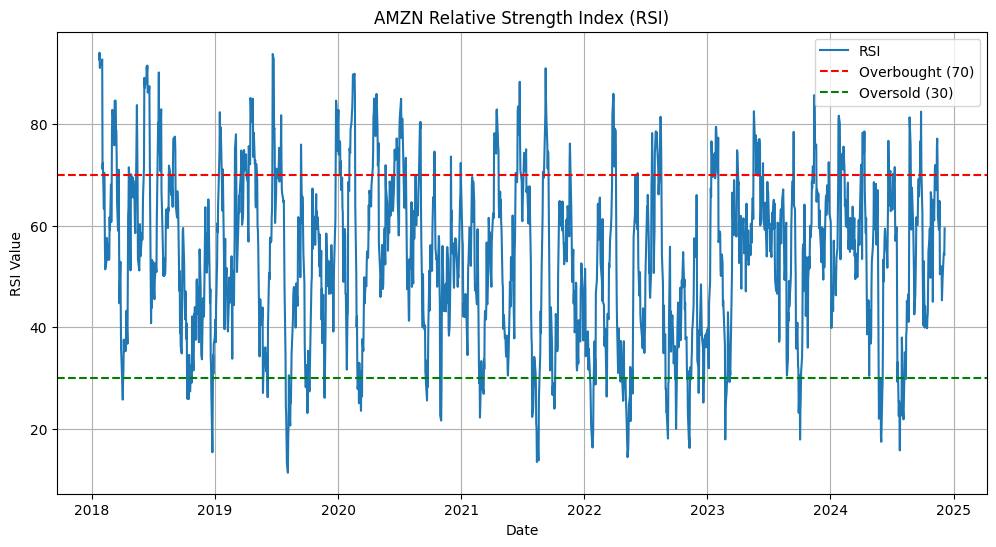

In [114]:
# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.title('AMZN Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()


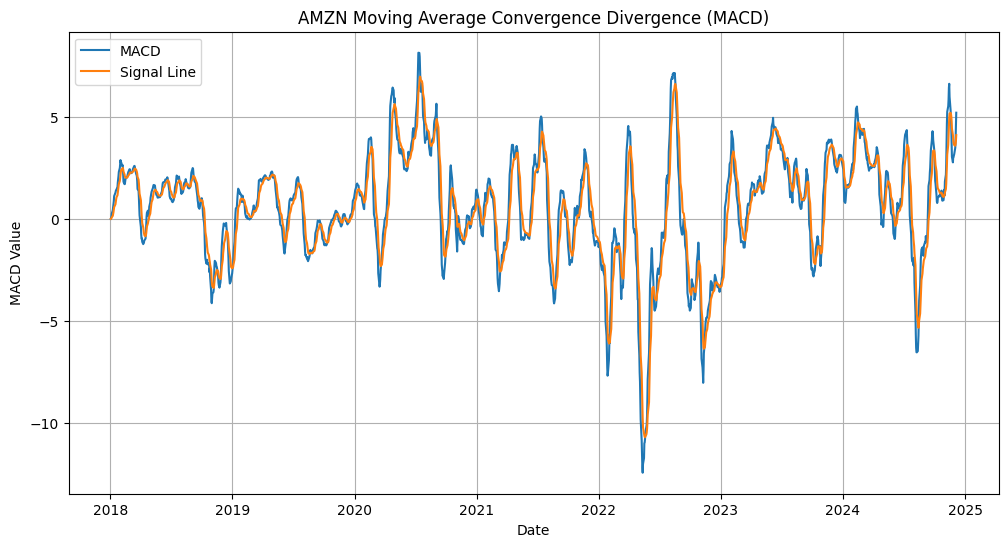

In [115]:
# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD')
plt.plot(stock_data['Date'], stock_data['Signal_Line'], label='Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('AMZN Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.grid(True)
plt.show()

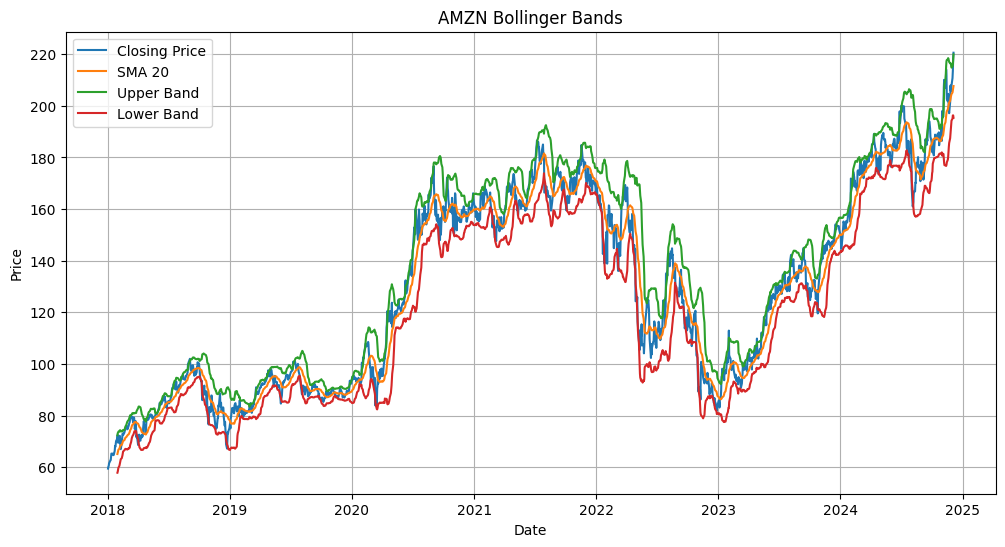

In [116]:
# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.plot(stock_data['Date'], stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band')
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMZN Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()

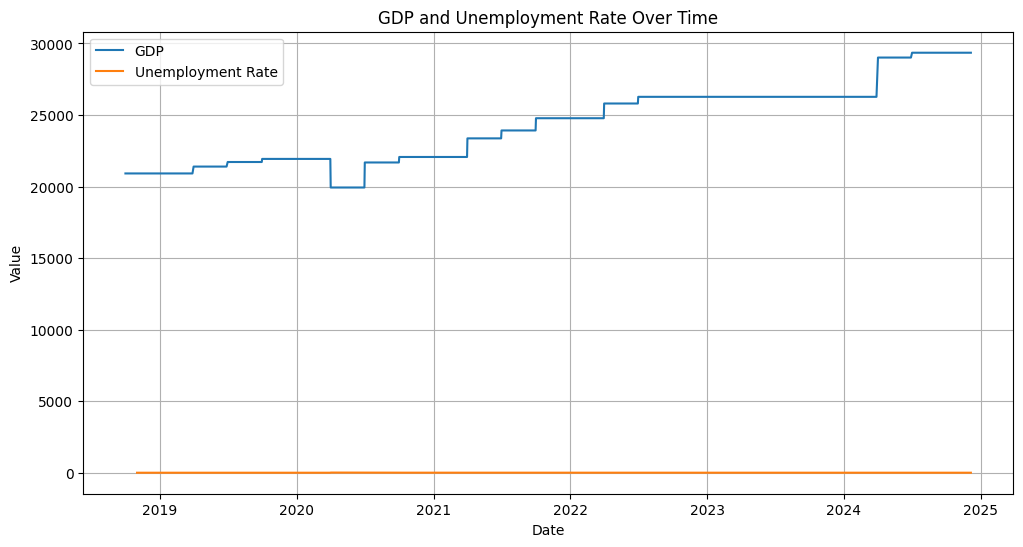

In [118]:
# Plot GDP and Unemployment Rate against time (if available in merged_df)
if 'GDP_Value' in merged_df.columns and 'Unemployment_Rate' in merged_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['Date'], merged_df['GDP_Value'], label='GDP')
    plt.plot(merged_df['Date'], merged_df['Unemployment_Rate'], label='Unemployment Rate')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('GDP and Unemployment Rate Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# prompt: generate plots

import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.plot(stock_data['Date'], stock_data['SMA_50'], label='SMA 50')
plt.plot(stock_data['Date'], stock_data['EMA_50'], label='EMA 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMZN Stock Price with SMA and EMA')
plt.legend()
plt.grid(True)
plt.show()


# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.title('AMZN Relative Strength Index (RSI)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD')
plt.plot(stock_data['Date'], stock_data['Signal_Line'], label='Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('AMZN Moving Average Convergence Divergence (MACD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
plt.plot(stock_data['Date'], stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band')
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMZN Bollinger Bands')
plt.legend()
plt.grid(True)
plt.show()

# Plot Stochastic Oscillator
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['%K'], label='%K')
plt.plot(stock_data['Date'], stock_data['%D'], label='%D')
plt.xlabel('Date')
plt.ylabel('Stochastic Oscillator Value')
plt.title('AMZN Stochastic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

# Plot GDP and Unemployment Rate against time (if available in merged_df)
if 'GDP_Value' in merged_df.columns and 'Unemployment_Rate' in merged_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['Date'], merged_df['GDP_Value'], label='GDP')
    plt.plot(merged_df['Date'], merged_df['Unemployment_Rate'], label='Unemployment Rate')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('GDP and Unemployment Rate Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

In [75]:
merged_df.fillna(method='ffill', inplace=True)  # Forward fill for missing data

<ipython-input-75-4c774964cbbc>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill for missing data


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
features = merged_df[['GDP_Value', 'Unemployment_Rate', 'Open', 'High', 'Low']]  # Include more relevant features
target = merged_df['Close']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [106]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [108]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test[['GDP_Value', 'Unemployment_Rate', 'Open', 'High', 'Low']])  # Explicitly select the features

In [104]:
target = merged_df[['Close']]

In [109]:
# Evaluate the model (example using Mean Squared Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.6700718355873851


In [110]:
new_data_point = pd.DataFrame({'GDP_Value': [25000], 'Unemployment_Rate': [3.8], 'Open': [170], 'High': [175], 'Low': [165]})
predicted_price = rf_model.predict(new_data_point)
print(f"Predicted Price: {predicted_price[0]}")

Predicted Price: 171.8777
